<a href="https://colab.research.google.com/github/agulhane090398/PythonViz/blob/main/AdEase_TimeSeries_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AdEase Time Series

Ad Ease is an ads and marketing based company helping businesses elicit maximum clicks @ minimum cost. AdEase is an ad infrastructure to help businesses promote themselves easily, effectively, and economically. The interplay of 3 AI modules - Design, Dispense, and Decipher, come together to make it this an end-to-end 3 step process digital advertising solution for all.

You are working in the Data Science team of Ad ease trying to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that you can predict and optimize the ad placement for your clients. You are provided with the data of 145k wikipedia pages and daily view count for each of them. Your clients belong to different regions and need data on how their ads will perform on pages in different languages.


Dataset:

https://drive.google.com/drive/folders/1mdgQscjqnCtdg7LGItomyK0abN6lcHBb


Data Dictionary:

There are two csv files given

train_1.csv: In the csv file, each row corresponds to a particular article and each column corresponds to a particular date. The values are the number of visits on that date.

The page name contains data in this format:

SPECIFIC NAME _ LANGUAGE.wikipedia.org _ ACCESS TYPE _ ACCESS ORIGIN

having information about the page name, the main domain, the device type used to access the page, and also the request origin(spider or browser agent)


Exog_Campaign_eng: This file contains data for the dates which had a campaign or significant event that could affect the views for that day. The data is just for pages in English.

There’s 1 for dates with campaigns and 0 for remaining dates. It is to be treated as an exogenous variable for models when training and forecasting data for pages in English



Concepts Tested:

Exploratory data analysis

Time Series forecasting- ARIMA, SARIMAX, and Prophet


What does “good” look like?

Importing the dataset and doing usual exploratory analysis steps like checking the structure & characteristics of the dataset

Checking null values and understanding their reason.

Understanding the page name format and splitting it to get different information.

Separating different values from it like title, language, access type, and access origin.

Visualizing the data and getting inferences from them

Converting the data to a format that can be fed to the Arima model (Pivoting etc)

Checking if the data is stationary

Dickey-Fuller test

Trying different methods for stationarity.

Decomposition of series.

Differencing the series.

Plotting the ACF and PACF plots

Give insights about the characteristics of the time series.

Modeling

Creating and training the Arima model

Getting the exogenous variable and using it to train a sarimax model

Use facebook prophet for forecasting


Finding a way(grid search / etc) to find the best params for at least 1 modeling approach.

Defining functions for all of the tasks.

Comparing results for all languages and creating inferences and recommendations from them

The MAPE for previous batches has been in the range of 4-8%


Evaluation Criteria (100 points)

Importing the dataset and doing usual exploratory analysis steps like checking the structure & characteristics of the dataset (10 points)

Exploratory Data Analysis (20 points)

Separating the data

Analyzing and visualizing the data

Getting inferences

Checking stationarity (20 points)

Formatting the data for the model

Dickey fuller test

Decomposition

Differencing

Creating model training and forecasting with ARIMA, SARIMAX (20 points)

ACF and PACF plot.

Training the model.

Forecasting for different languages/regions.

Plotting the final results

Forecasting with (20 points)

Facebook prophet
Creating a pipeline for working with multiple series (10 points)


Questionnaire:

Defining the problem statements and where can this and modifications of this be used?

Write 3 inferences you made from the data visualizations

What does the decomposition of series do?

What level of differencing gave you a stationary series?

Difference between arima, sarima & sarimax.

Compare the number of views in different languages

What other methods other than grid search would be suitable to get the model for all languages?

In [1]:
!pip install --upgrade --no-cache-dir gdown

In [2]:
import pandas as pd
import numpy as np
import pylab as p
import matplotlib.pyplot as plot
from collections import Counter
import re
import os
import seaborn as sns


In [3]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [4]:
import gdown
#url='https://drive.google.com/file/d/1gHYYLqLt6rMyeAyvHf1wvlQ4BLKwjv9W/view?usp=sharing'
#url='https://drive.google.com/file/d/1SL_7DoE16m71QpjJXoQUC3cI5aHCIZLv/view?usp=share_link'
#url='https://drive.google.com/file/d/11GQSe2Xm4vFD4Xfw3JhOoPlXnBE_LiMe/view?usp=sharing'
url='https://drive.google.com/file/d/1CJOMYyg64x3gN52p6OqypN6UUgDnUhkm/view?usp=sharing'

ider=url.split('/')[-2]
!gdown --id $ider

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1CJOMYyg64x3gN52p6OqypN6UUgDnUhkm
From (redirected): https://drive.google.com/uc?id=1CJOMYyg64x3gN52p6OqypN6UUgDnUhkm&confirm=t&uuid=ec68c8e7-6cf6-487e-82ff-86c02e9f3740
To: /content/new_train.csv
100% 425M/425M [00:05<00:00, 75.4MB/s]


In [5]:
train = pd.read_csv('new_train.csv')
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.britanica.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.britanica.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.britanica.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.britanica.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.britanica.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [8]:
train.isnull().sum()

,0
Page,0
2015-07-01,20740
2015-07-02,20816
2015-07-03,20544
2015-07-04,20654
...,...
2016-12-27,3701
2016-12-28,3822
2016-12-29,3826
2016-12-30,3635


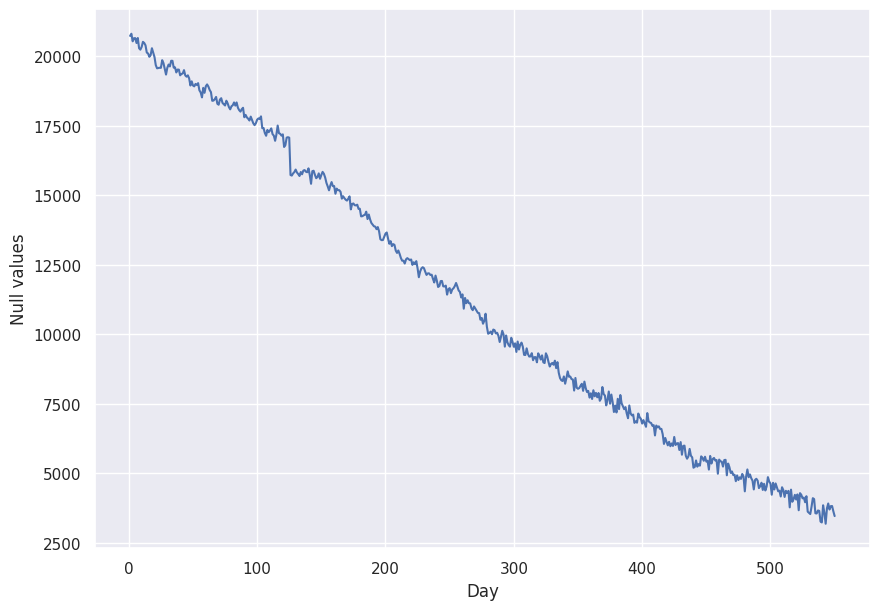

In [9]:
#We can see that their are some null values in the data, we will plot them to see how it looks
days = [r for r in range(1, len(train.columns))]
plot.figure(figsize=(10,7))
plot.xlabel('Day')
plot.ylabel('Null values')
plot.plot(days, train.isnull().sum()[1:])


We see that the number of nan values decrease with time.

Reason: Some website have all nan values in the begining, that can be due to the fact that those were created after that time so there is no traffic reading for that time

In [10]:
print(train.shape)
train=train.dropna(how='all')
#‘all’ : If all values are NA, drop that row or column.
print(train.shape)

train=train.dropna(thresh=300) #drop rows that have nan more than 300 days
print(train.shape)
train=train.fillna(0)
train.tail()

(145063, 551)
(145063, 551)
(133617, 551)


,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
145012,Legión_(Marvel_Comics)_es.britanica.org_all-ac...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,3.0,2.0,4.0,2.0,4.0,4.0,1.0,2.0,2.0
145013,Referéndum_sobre_la_permanencia_del_Reino_Unid...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,16.0,8.0,3.0,6.0,3.0,3.0,10.0,11.0,3.0
145014,Salida_del_Reino_Unido_de_la_Unión_Europea_es....,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.0,36.0,23.0,182.0,43.0,8.0,22.0,13.0,18.0,14.0
145015,"Amar,_después_de_amar_es.britanica.org_all-acc...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,30.0,27.0,14.0,8.0,7.0,5.0,43.0,12.0,25.0
145016,Anexo:89.º_Premios_Óscar_es.britanica.org_all-...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [13]:
train['Page'][1], train['Page'][200], train['Page'][3000]

('2PM_zh.britanica.org_all-access_spider',
 '花兒與少年_zh.britanica.org_all-access_spider',
 '陳嘉寶_zh.britanica.org_all-access_spider')

 The page values are in this format


 **SPECIFIC NAME _ LANGUAGE.britanica.org _ ACCESS TYPE _ ACCESS ORIGIN**

having information about page name, the main domain, device type used to access the page, and also the request origin(spider or browser agent)


In [14]:
#Usage of Regex
def split_page(page):
    w = re.split('_|\.', page)
    print(w)
    return ' '.join(w[:-5]), w[-5], w[-2], w[-1]

split_page('2NE1_zh.britanica.org_all-access_spider')

['2NE1', 'zh', 'britanica', 'org', 'all-access', 'spider']


('2NE1', 'zh', 'all-access', 'spider')

In [15]:
li = list(train.Page.apply(lambda x: split_page(str(x))))
df = pd.DataFrame(li)
df.columns = ['Title', 'Language', 'Access_type','Access_origin']
df = pd.concat([train, df], axis = 1)

Streaming output truncated to the last 5000 lines.
['Macklemore', 'de', 'britanica', 'org', 'all-access', 'all-agents']
['Mad', 'Max', 'de', 'britanica', 'org', 'all-access', 'all-agents']
['Madrid', 'de', 'britanica', 'org', 'all-access', 'all-agents']
['Magdalena', 'Brzeska', 'de', 'britanica', 'org', 'all-access', 'all-agents']
['Magdalena', 'Neuner', 'de', 'britanica', 'org', 'all-access', 'all-agents']
['Maggie', 'Smith', 'de', 'britanica', 'org', 'all-access', 'all-agents']
['Maghreb', 'de', 'britanica', 'org', 'all-access', 'all-agents']
['Magic', 'Johnson', 'de', 'britanica', 'org', 'all-access', 'all-agents']
['Magnus', 'Carlsen', 'de', 'britanica', 'org', 'all-access', 'all-agents']
['Maisie', 'Williams', 'de', 'britanica', 'org', 'all-access', 'all-agents']
['Malente', 'de', 'britanica', 'org', 'all-access', 'all-agents']
['Malu', 'Dreyer', 'de', 'britanica', 'org', 'all-access', 'all-agents']
['Manchester', 'by', 'the', 'Sea', 'de', 'britanica', 'org', 'all-access', 'all-ag

In [16]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Language,Access_type,Access_origin
0,2NE1_zh.britanica.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,14.0,20.0,22.0,19.0,18.0,20.0,2NE1,zh,all-access,spider
1,2PM_zh.britanica.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,9.0,30.0,52.0,45.0,26.0,20.0,2PM,zh,all-access,spider
2,3C_zh.britanica.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,3C,zh,all-access,spider
3,4minute_zh.britanica.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,16.0,11.0,17.0,19.0,10.0,11.0,4minute,zh,all-access,spider
5,5566_zh.britanica.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,32.0,19.0,23.0,17.0,17.0,50.0,A'N'D,zh,all-access,spider


<Axes: xlabel='count', ylabel='Language'>

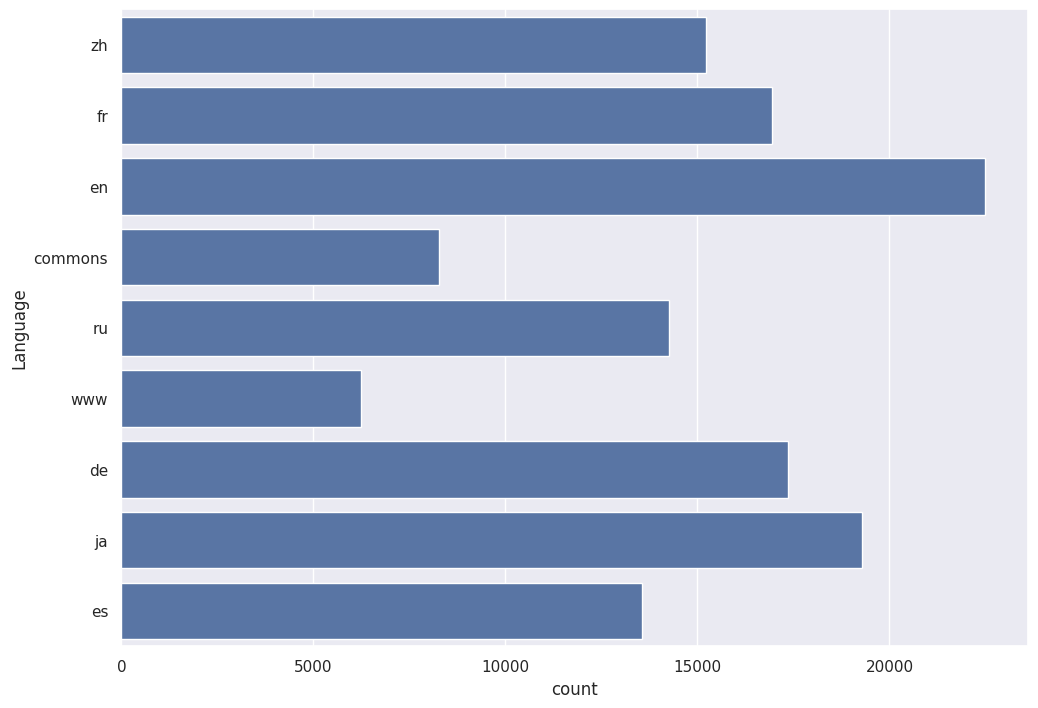

In [18]:
sns.countplot(df['Language'])

This above is the comparision number of articles in each language

{'ja':'Japanese', 'de':'German',  'en' : 'English',  'no_lang':'Media_File',  'fr':'French',  'zh':'Chinese',  'ru':'Russian',  'es':'Spanish'}

<Axes: xlabel='count', ylabel='Access_type'>

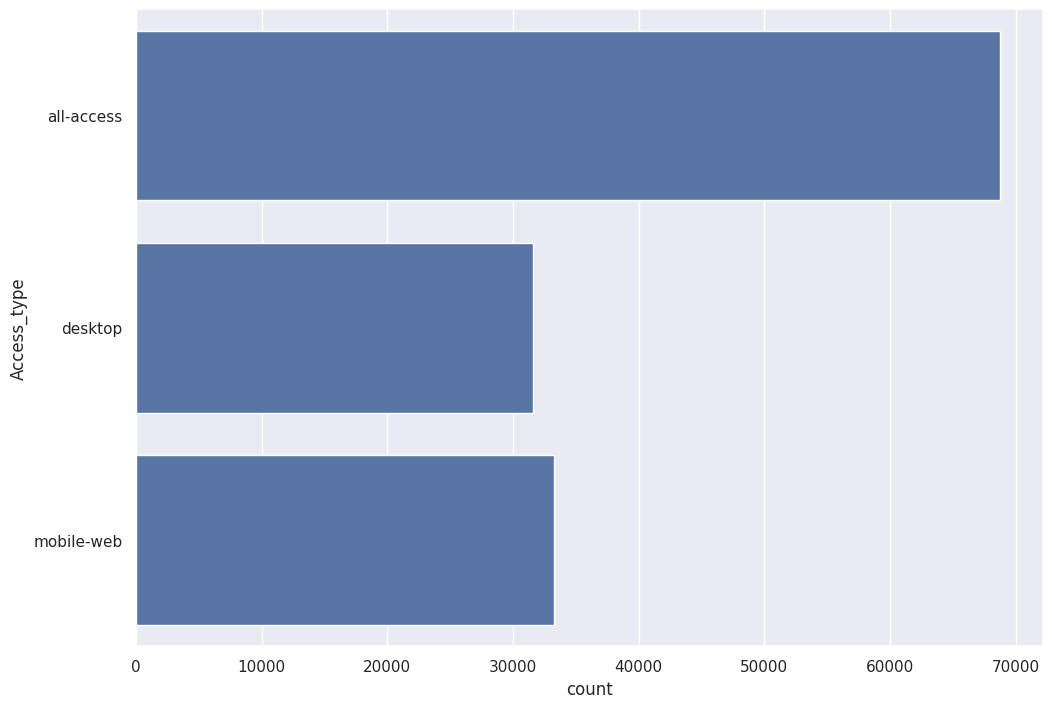

In [19]:
sns.countplot(df['Access_type'])

This comparision shows that usage from desktop and mobile is almost the same

<Axes: xlabel='count', ylabel='Access_origin'>

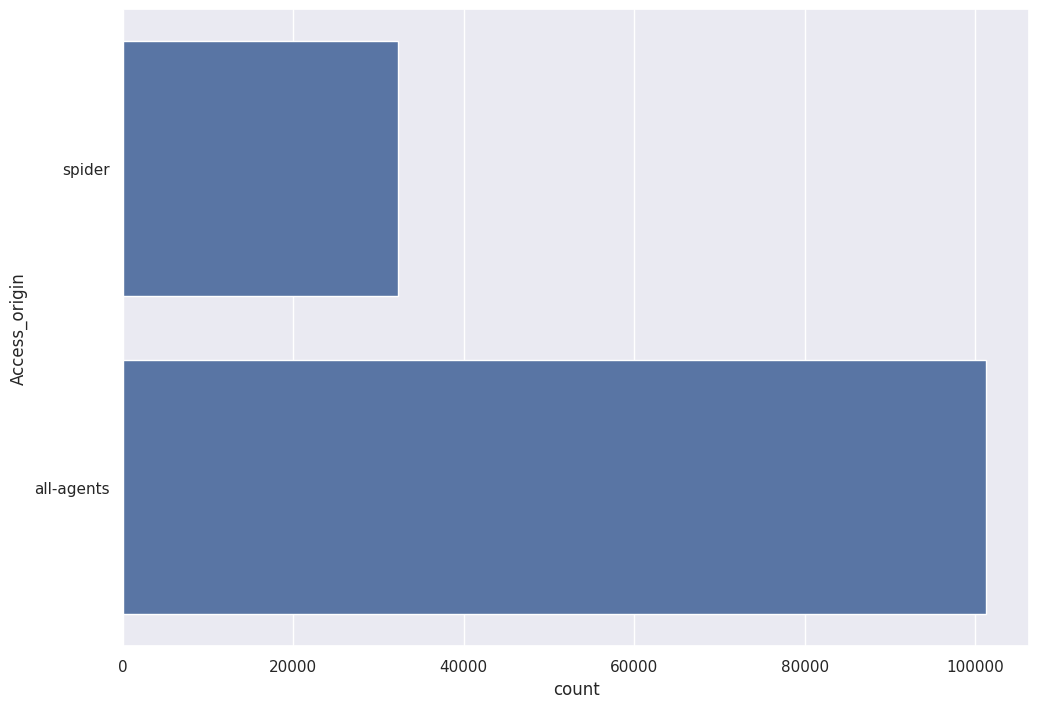

In [20]:
sns.countplot(df['Access_origin'])

This shows that organic view is far more than that of spiders or bots

**Now we want to compare the views for different languages**

In [21]:
df.groupby('Language').count()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Access_type,Access_origin
Language,,,,,,,,,,,,,,,,,,,,,
commons,7672,7672,7672,7672,7672,7672,7672,7672,7672,7672,...,7672,7672,7672,7672,7672,7672,7672,8266,8266,8266
de,15946,15946,15946,15946,15946,15946,15946,15946,15946,15946,...,15946,15946,15946,15946,15946,15946,15946,17362,17362,17362
en,20758,20758,20758,20758,20758,20758,20758,20758,20758,20758,...,20758,20758,20758,20758,20758,20758,20758,22486,22486,22486
es,12268,12268,12268,12268,12268,12268,12268,12268,12268,12268,...,12268,12268,12268,12268,12268,12268,12268,13551,13551,13551
fr,15418,15418,15418,15418,15418,15418,15418,15418,15418,15418,...,15418,15418,15418,15418,15418,15418,15418,16948,16948,16948
ja,17132,17132,17132,17132,17132,17132,17132,17132,17132,17132,...,17132,17132,17132,17132,17132,17132,17132,19295,19295,19295
ru,12955,12955,12955,12955,12955,12955,12955,12955,12955,12955,...,12955,12955,12955,12955,12955,12955,12955,14270,14270,14270
www,5743,5743,5743,5743,5743,5743,5743,5743,5743,5743,...,5743,5743,5743,5743,5743,5743,5743,6228,6228,6228
zh,14845,14845,14845,14845,14845,14845,14845,14845,14845,14845,...,14845,14845,14845,14845,14845,14845,14845,15211,15211,15211


In [22]:
df[df['Language']=='commons']

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Language,Access_type,Access_origin
12271,Burning_Man_en.britanica.org_desktop_all-agents,1693.0,1490.0,1186.0,1099.0,1051.0,1968.0,1874.0,1637.0,1842.0,...,940.0,2976.0,2447.0,1648.0,1282.0,956.0,Accueil,commons,all-access,spider
12272,Cali_Cartel_en.britanica.org_desktop_all-agents,348.0,363.0,214.0,252.0,257.0,320.0,340.0,345.0,432.0,...,1197.0,1449.0,1376.0,1350.0,1287.0,992.0,Atlas of Asia,commons,all-access,spider
12273,Call_of_Duty:_Modern_Warfare_2_en.britanica.or...,806.0,768.0,700.0,725.0,723.0,823.0,849.0,731.0,833.0,...,818.0,929.0,892.0,878.0,893.0,712.0,Atlas of Europe,commons,all-access,spider
12274,Calvin_Harris_en.britanica.org_desktop_all-agents,7114.0,5599.0,7685.0,15844.0,9390.0,7173.0,5499.0,6367.0,5630.0,...,1242.0,1409.0,1714.0,1604.0,1602.0,1300.0,Atlas of World War II,commons,all-access,spider
12275,Carl_Sagan_en.britanica.org_desktop_all-agents,1808.0,1759.0,1838.0,1631.0,1701.0,2230.0,2052.0,2065.0,2002.0,...,1425.0,1730.0,1858.0,1781.0,1718.0,1345.0,Atlas of colonialism,commons,all-access,spider
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,File:Zyworodka - Kalanchoe daigremontiana JPG,commons,desktop,all-agents
75150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Commons:Open proxy detection,commons,desktop,all-agents
75178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,File:Crabs (Pachygrapsus marmoratus) webm,commons,desktop,all-agents
75237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Басты бет,commons,desktop,all-agents


In [23]:
# Checking another way of fetching the language out of the string
def lang(Page):
    val = re.search('[a-z][a-z].britanica.org',Page)
    if val:
        print(val)
        #print(val[0][0:2] )

        return val[0][0:2]

    return 'no_lang'

df['Language']=df['Page'].apply(lambda x: lang(str(x)))

Streaming output truncated to the last 5000 lines.
<re.Match object; span=(11, 27), match='de.britanica.org'>
<re.Match object; span=(8, 24), match='de.britanica.org'>
<re.Match object; span=(7, 23), match='de.britanica.org'>
<re.Match object; span=(18, 34), match='de.britanica.org'>
<re.Match object; span=(17, 33), match='de.britanica.org'>
<re.Match object; span=(13, 29), match='de.britanica.org'>
<re.Match object; span=(8, 24), match='de.britanica.org'>
<re.Match object; span=(14, 30), match='de.britanica.org'>
<re.Match object; span=(15, 31), match='de.britanica.org'>
<re.Match object; span=(16, 32), match='de.britanica.org'>
<re.Match object; span=(8, 24), match='de.britanica.org'>
<re.Match object; span=(12, 28), match='de.britanica.org'>
<re.Match object; span=(22, 38), match='de.britanica.org'>
<re.Match object; span=(15, 31), match='de.britanica.org'>
<re.Match object; span=(16, 32), match='de.britanica.org'>
<re.Match object; span=(13, 29), match='de.britanica.org'>
<re.Match

In [25]:
df.groupby('Language').count() #now the count has increased. You can go back and get it sorted

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Access_type,Access_origin
Language,,,,,,,,,,,,,,,,,,,,,
de,17362,17362,17362,17362,17362,17362,17362,17362,17362,17362,...,17362,17362,17362,17362,17362,17362,17362,13046,13046,13046
en,22486,22486,22486,22486,22486,22486,22486,22486,22486,22486,...,22486,22486,22486,22486,22486,22486,22486,22486,22486,22486
es,13551,13551,13551,13551,13551,13551,13551,13551,13551,13551,...,13551,13551,13551,13551,13551,13551,13551,10142,10142,10142
fr,16948,16948,16948,16948,16948,16948,16948,16948,16948,16948,...,16948,16948,16948,16948,16948,16948,16948,16948,16948,16948
ja,19295,19295,19295,19295,19295,19295,19295,19295,19295,19295,...,19295,19295,19295,19295,19295,19295,19295,16140,16140,16140
no_lang,14494,14494,14494,14494,14494,14494,14494,14494,14494,14494,...,14494,14494,14494,14494,14494,14494,14494,25374,25374,25374
ru,14270,14270,14270,14270,14270,14270,14270,14270,14270,14270,...,14270,14270,14270,14270,14270,14270,14270,14270,14270,14270
zh,15211,15211,15211,15211,15211,15211,15211,15211,15211,15211,...,15211,15211,15211,15211,15211,15211,15211,15211,15211,15211


In [29]:
# Select only the date columns for calculating the mean
date_cols = df.columns.drop(['Page', 'Title', 'Language', 'Access_type', 'Access_origin'])
df_language = df.groupby('Language')[date_cols].mean().transpose()

In [30]:
df_language.head()

Language,de,en,es,fr,ja,no_lang,ru,zh
2015-07-01,763.765926,3767.328604,1127.485204,499.092872,614.637160,102.733545,663.199229,272.498521
2015-07-02,753.362861,3755.158765,1077.485425,502.297852,705.813216,107.663447,674.677015,272.906778
2015-07-03,723.074415,3565.225696,990.895949,483.007553,637.451671,101.769629,625.329783,271.097167
2015-07-04,663.537323,3711.782932,930.303151,516.275785,800.897435,86.853871,588.171829,273.712379
2015-07-05,771.358657,3833.433025,1011.759575,506.871666,768.352319,96.254105,626.385354,291.977713


In [31]:
df_language=df.groupby('Language').mean().transpose()
df_language

TypeError: agg function failed [how->mean,dtype->object]

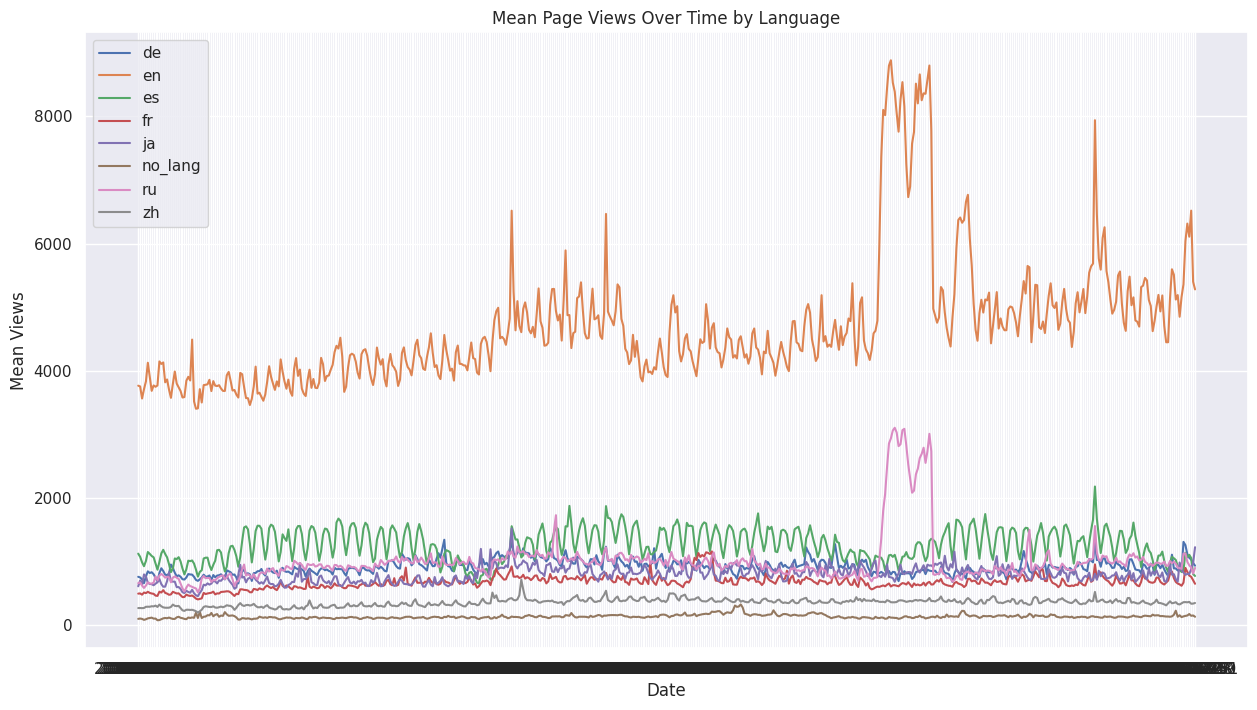

In [32]:
plot.figure(figsize=(15, 8))
for language in df_language.columns:
    plot.plot(df_language.index, df_language[language], label=language)

plot.xlabel('Date')
plot.ylabel('Mean Views')
plot.title('Mean Page Views Over Time by Language')
plot.legend()
plot.grid(True)
plot.show()

Ploting the data shows that articles in english get the most number of views as compared to different languages, there are some spikes at different times in different laguages

Text(0, 0.5, 'Views per Page')

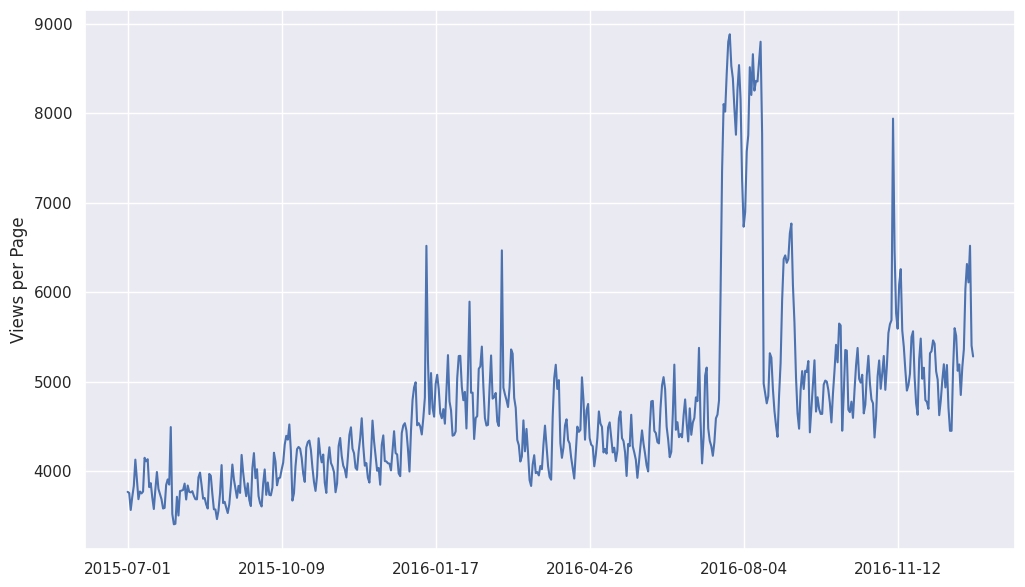

In [33]:
# Ploting just for english because we are going to use this for our furthur investigation and predictions
df_language['en'].plot(figsize=(12,7))
plot.ylabel('Views per Page')

In [34]:
total_view=df_language.copy()

# **Checking the stationarity**

Dickey-Fuller test

**Here the null hypothesis is that the TS is non-stationary**:
The test results comprise of a Test Statistic and some Critical Values for difference confidence levels.


In [35]:
from statsmodels.tsa.stattools import adfuller
def df_test(x):
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])

df_test(total_view['en'])

ADF Stastistic: -2.373563
p-value: 0.149337


We see that the p value is not low enough(<0.05). Therefore, we can say our series in not stationary as we fail to reject the null hypothesis

# **Making the time series stationary**


In [37]:
ts=total_view['en']

In [38]:
ts

,en
2015-07-01,3767.328604
2015-07-02,3755.158765
2015-07-03,3565.225696
2015-07-04,3711.782932
2015-07-05,3833.433025
...,...
2016-12-27,6314.335275
2016-12-28,6108.874144
2016-12-29,6518.058525
2016-12-30,5401.792360


## **1. Remove trend and seasonality with decomposition**

**Additive or multiplicative?**
  It’s important to understand what the difference between a multiplicative time series and an additive one before we go any further.

  There are three components to a time series:
   

1.   trend how things are overall changing
2.   seasonality how things change within a given period e.g. a year, month, week, day
3. error/residual/irregular activity not explained by the trend or the seasonal value

  How these three components interact determines the difference between a multiplicative and an additive time series.

  **In a multiplicative time series,** the components multiply together to make the time series. If you have an increasing trend, the amplitude of seasonal activity increases. Everything becomes more exaggerated. This is common when you’re looking at web traffic.

  **In an additive time series,** the components add together to make the time series. If you have an increasing trend, you still see roughly the same size peaks and troughs throughout the time series. This is often seen in indexed time series where the absolute value is growing but changes stay relative.



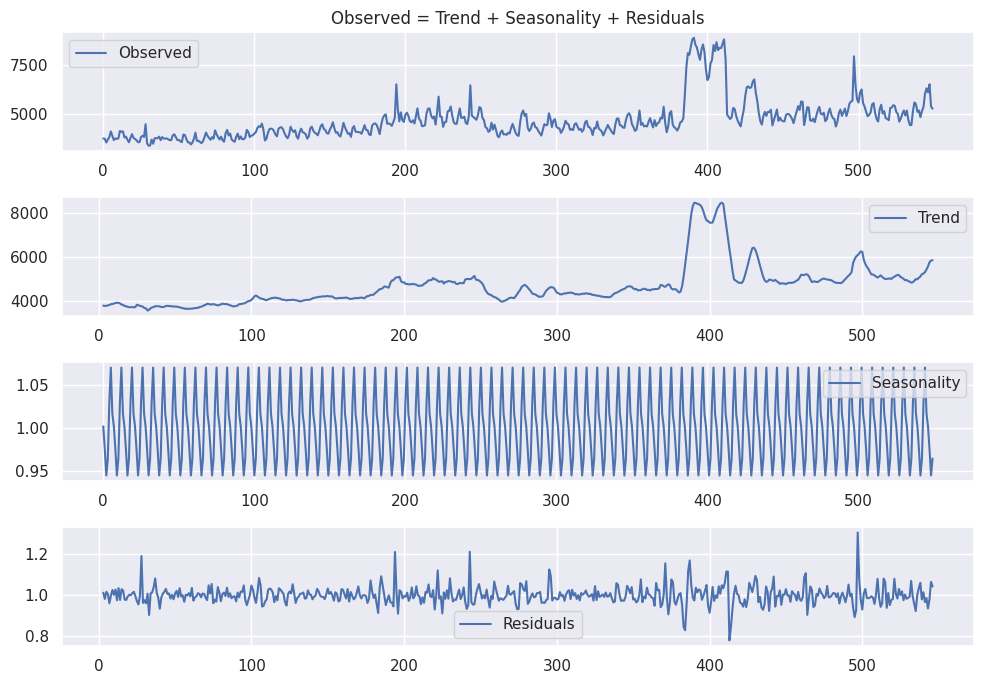

In [43]:
# Naive decomposition of our Time Series as explained above
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts.values, model='multiplicative',period = 7)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plot.figure(figsize=(10,7))
plot.subplot(411)
plot.title('Observed = Trend + Seasonality + Residuals')
plot.plot(ts.values,label='Observed')
plot.legend(loc='best')
plot.subplot(412)
plot.plot(trend, label='Trend')
plot.legend(loc='best')
plot.subplot(413)
plot.plot(seasonal,label='Seasonality')
plot.legend(loc='best')
plot.subplot(414)
plot.plot(residual, label='Residuals')
plot.legend(loc='best')
plot.tight_layout()
plot.show()

In [44]:
ts_decompose=pd.DataFrame(residual).fillna(0)[0].values
df_test(ts_decompose)

ADF Stastistic: -3.796320
p-value: 0.002945


We can see that our series is now stationary, we can also try diffrencing to see what results we can get.

# **2. Remove trend and seasonality with differencing**


In [46]:
ts.shift(1)

,en
2015-07-01,NaN
2015-07-02,3767.328604
2015-07-03,3755.158765
2015-07-04,3565.225696
2015-07-05,3711.782932
...,...
2016-12-27,6036.850129
2016-12-28,6314.335275
2016-12-29,6108.874144
2016-12-30,6518.058525


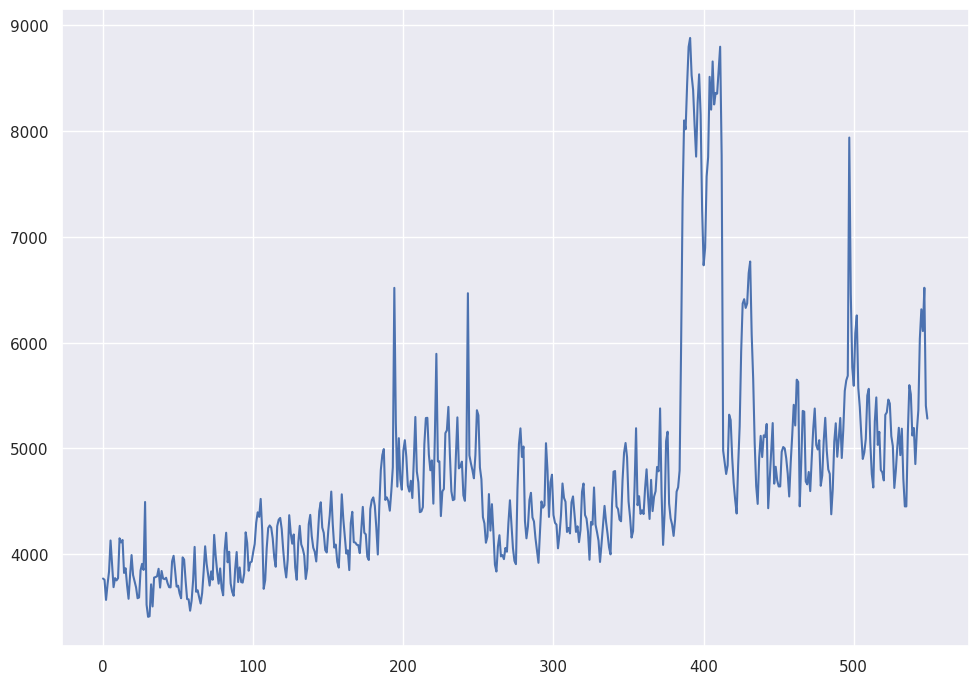

In [48]:
plot.plot(ts.values)
plot.show()

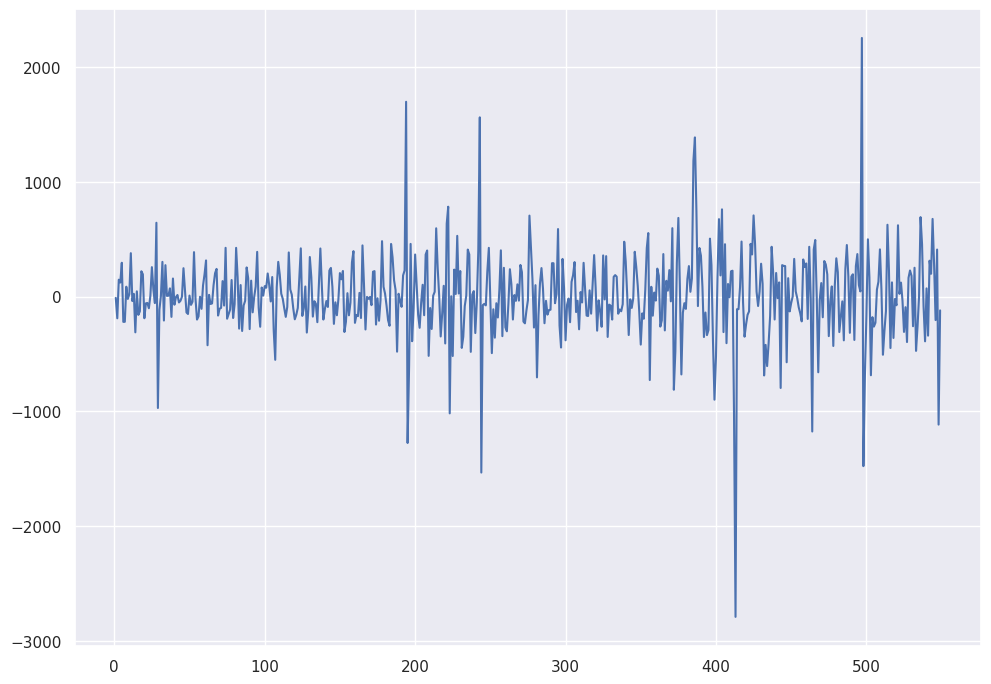

In [47]:
ts_diff = ts - ts.shift(1)
plot.plot(ts_diff.values)
plot.show()

In [49]:
ts_diff.dropna(inplace=True)
df_test(ts_diff)

ADF Stastistic: -8.273590
p-value: 0.000000


**Also the p value is 0. So we can say that our graph is now stationery.
Now we can apply the ARIMA model**

**How do we choose p,d,q**

a thumb rule that for choosing the p,q values are when the lag goes below the significant level
- we use PACF for p, here we see that till lag 5 there are significat lines, if we want our model to be simpler we can start with a smaller number like 3/4
- we use ACF for q. here we can see that lag 4 is below significant level so we will use till lag 3
- for d we can see that at 1 diffencing the series becomes stationary so we choose d as 1

### Plot the autocorreltaion and partial auto correlation functions

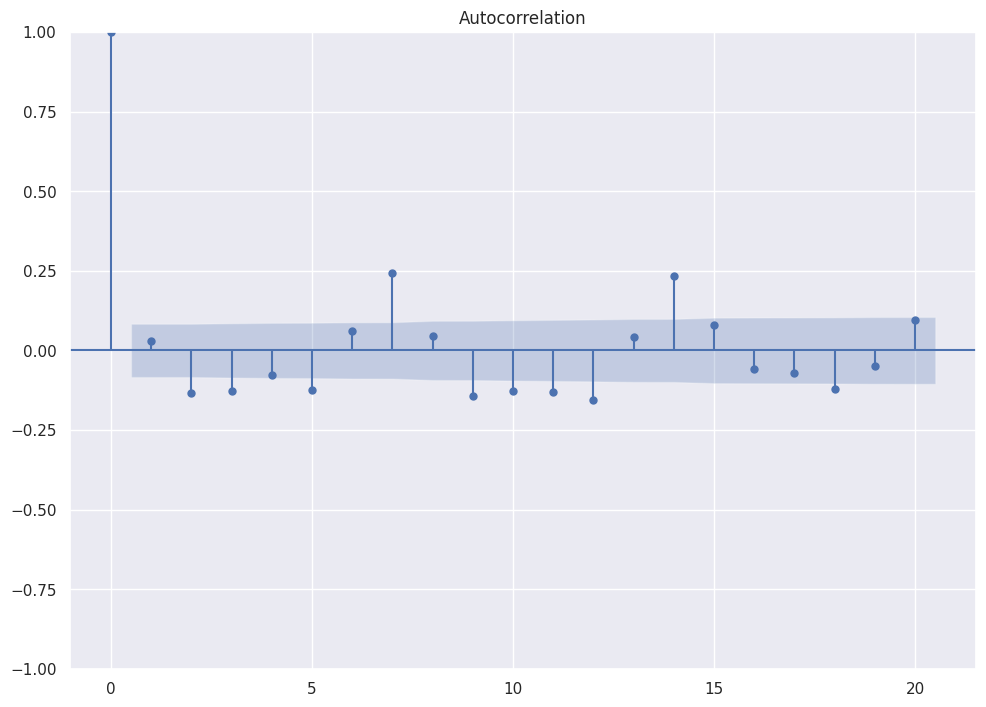

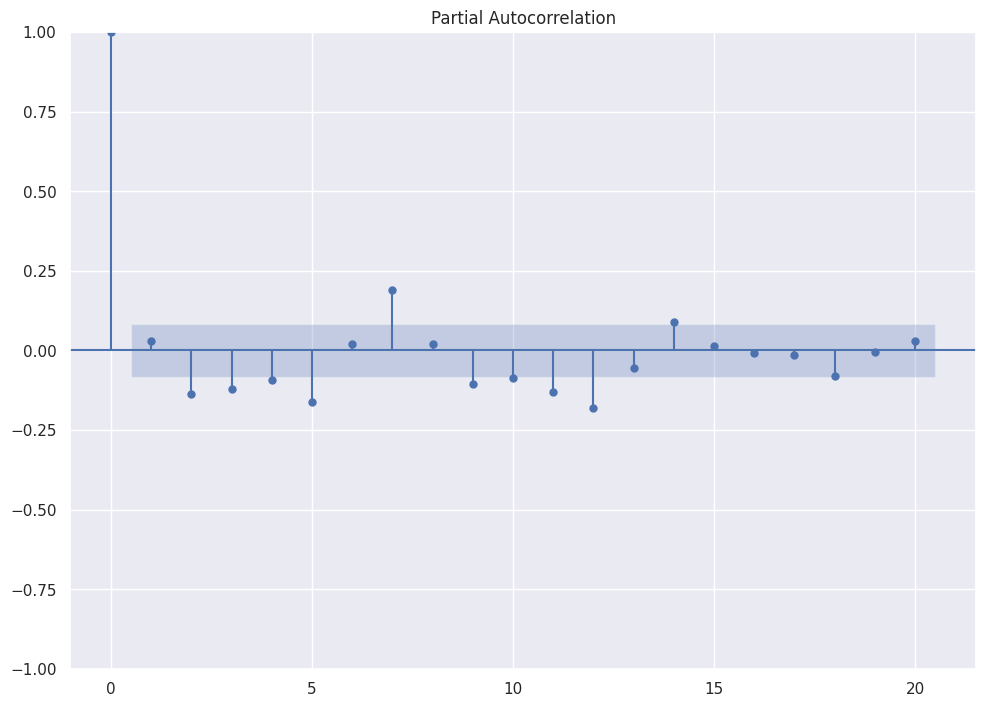

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf=plot_acf(ts_diff,lags=20)
pacf=plot_pacf(ts_diff,lags=20)

# **ARIMA MODEL**

In [52]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame
model = ARIMA(ts, order=(4,1,3))
model_fit = model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


When you set dynamic=True, the model continuously predicts one-step ahead (t+1) and then for the 2nd step ahead (t+2) prediction, it appends predicted value (t+1) to data, re-fits model on new expanded data then makes 2nd step ahead forecast. This is called out-of-sample prediction.

When you set dynamic=False, the model sequentially predicts one-step-ahead using the true value from previous time step instead of using predicted value. This is called in-sample prediction.

On your first comparison of plots as you predict from 509 to 533, the reason you get same plots is you are extrapolating, you do not have true values of next 24 steps that you predicted therefor regardless of setting dynamic either True or False model uses out-of-sample approach.

Since out-of-sample approach uses the last predicted value from the previous time step to predict the next value in time, as number of steps get farther, it is expected to deviate from actual values because on each step's prediction fitted model learns previous predicted step's errors as well.


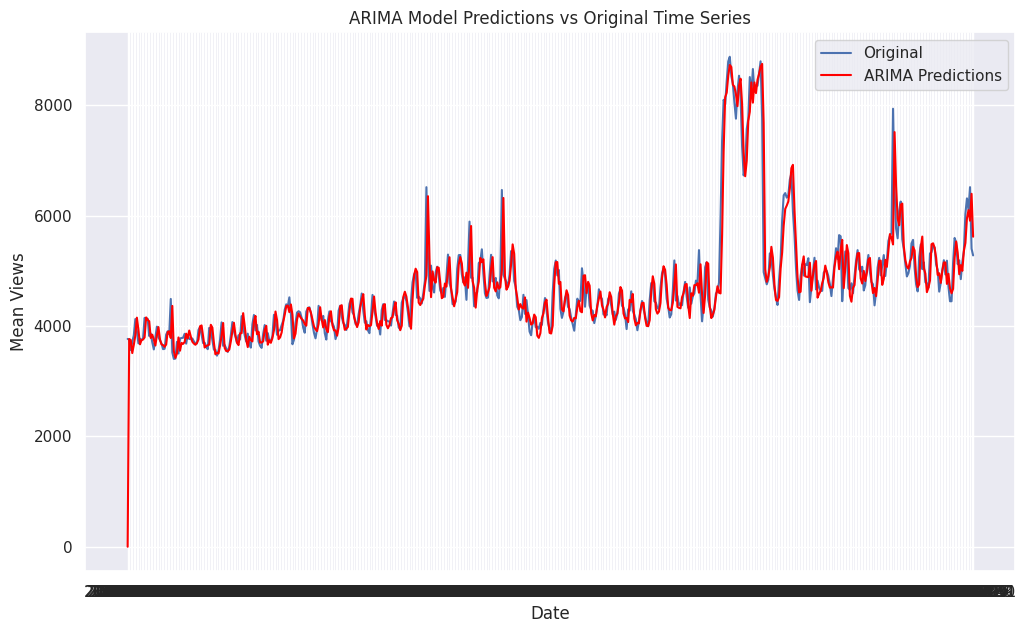

In [54]:
# Get predictions
predictions = model_fit.predict(start=0, end=len(ts)-1)

# Plot the original time series and the predictions
plot.figure(figsize=(12, 7))
plot.plot(ts.index, ts.values, label='Original')
plot.plot(ts.index, predictions, color='red', label='ARIMA Predictions')
plot.xlabel('Date')
plot.ylabel('Mean Views')
plot.title('ARIMA Model Predictions vs Original Time Series')
plot.legend()
plot.grid(True)
plot.show()

In [55]:
train = ts[:-20]
test = ts[-20:]

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


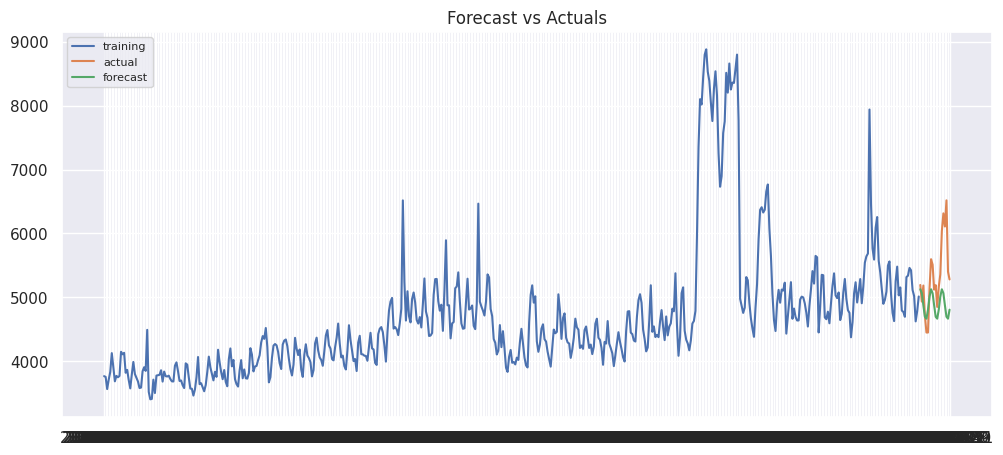

In [57]:
model = ARIMA(train, order=(4, 1, 3))
fitted = model.fit()

# Forecast
fc = fitted.forecast(20)

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plot.figure(figsize=(12,5), dpi=100)
plot.plot(train, label='training')
plot.plot(test, label='actual')
plot.plot(fc_series, label='forecast')

plot.title('Forecast vs Actuals')
plot.legend(loc='upper left', fontsize=8)

In [58]:
mape = np.mean(np.abs(fc - test.values)/np.abs(test.values))
rmse = np.mean((fc - test.values)**2)**.5
print("mape:",mape)
print("rsme:",rmse)

mape: 0.08968301201328599
rsme: 682.60268092871


we can see that the model does not perform very well for multistep out sample data

from the decomposition we can see that there is a weekly seasonality and still some spikes in the residual, that may be because of some external factors, which we can take into account by using them as our exogenous variable

In [59]:
!gdown 1H9054-eVP9IdANPOblXwX7Nd2r_Sjf1u

Downloading...
From: https://drive.google.com/uc?id=1H9054-eVP9IdANPOblXwX7Nd2r_Sjf1u
To: /content/Exog_Campaign_eng
100% 1.10k/1.10k [00:00<00:00, 3.47MB/s]


In [60]:
ex_df = pd.read_csv('Exog_Campaign_eng') #We get the exogenous data from this csv file for english pages
ex_df.head()

,Exog
0,0
1,0
2,0
3,0
4,0


In [61]:
exog=ex_df['Exog'].to_numpy()

we will train a sarimax model for that and see if we get anyimprovements from using the two information.

the seasonal order and the values of PDQ are based upon various trials and comparision of the models
- we see a seasonality of 7 from the plots ie: weekly seasonality ( from the plots we can see that afte some insignificant plots we have some significant values repeating at intervals of 7 ie: 7,14 ... )
- the non seasonal order we can keep the same

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


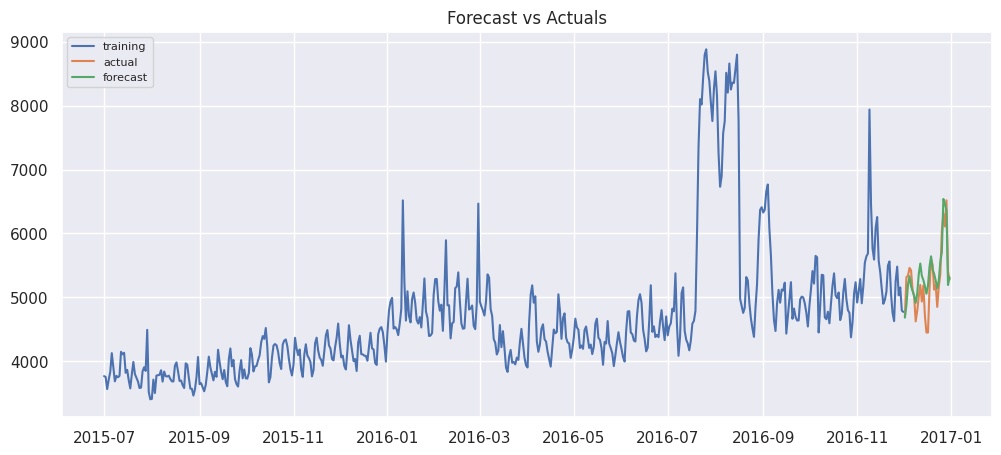

In [63]:
import statsmodels.api as sm
train=ts[:520]
test=ts[520:]
model=sm.tsa.statespace.SARIMAX(train,order=(4, 1, 3),seasonal_order=(1,1,1,7),exog=exog[:520])
results=model.fit()

fc=results.forecast(30,dynamic=True,exog=pd.DataFrame(exog[520:]))

# Make as pandas series
fc_series = pd.Series(fc)
# Plot
train.index=train.index.astype('datetime64[ns]')
test.index=test.index.astype('datetime64[ns]')
plot.figure(figsize=(12,5), dpi=100)
plot.plot(train, label='training')
plot.plot(test, label='actual')
plot.plot(fc_series, label='forecast')

plot.title('Forecast vs Actuals')
plot.legend(loc='upper left', fontsize=8)

In [64]:
mape = np.mean(np.abs(fc - test.values)/np.abs(test.values))
rmse = np.mean((fc - test.values)**2)**.5
print("mape:",mape)
print("rsme:",rmse)

mape: 0.047288743633240794
rsme: 297.2690442999691


**The mean absolute percentage error and the root mean squared error is low for SARIMAX**

## Regression for a time series

In [65]:
ts_df=ts.to_frame()
ts_df.head()

,en
2015-07-01,3767.328604
2015-07-02,3755.158765
2015-07-03,3565.225696
2015-07-04,3711.782932
2015-07-05,3833.433025


In [66]:
ts_df.reset_index(level=0, inplace=True)
ts_df['date']=pd.to_datetime(ts_df['index'])
ts_df.drop(['index'],axis=1,inplace=True)
ts_df.head()

,en,date
0,3767.328604,2015-07-01
1,3755.158765,2015-07-02
2,3565.225696,2015-07-03
3,3711.782932,2015-07-04
4,3833.433025,2015-07-05


In [67]:
ts_df['day_of_week']=ts_df['date'].dt.day_name()
ts_df.head()

,en,date,day_of_week
0,3767.328604,2015-07-01,Wednesday
1,3755.158765,2015-07-02,Thursday
2,3565.225696,2015-07-03,Friday
3,3711.782932,2015-07-04,Saturday
4,3833.433025,2015-07-05,Sunday


In [68]:
ts_df=pd.get_dummies(ts_df, columns = ['day_of_week'])

In [69]:
ts_df.head()

,en,date,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,3767.328604,2015-07-01,False,False,False,False,False,False,True
1,3755.158765,2015-07-02,False,False,False,False,True,False,False
2,3565.225696,2015-07-03,True,False,False,False,False,False,False
3,3711.782932,2015-07-04,False,False,True,False,False,False,False
4,3833.433025,2015-07-05,False,False,False,True,False,False,False


In [70]:
ts_df['exog']=ex_df['Exog']
ts_df['rolling_mean']=ts_df['en'].rolling(7).mean()

In [72]:
ts_df.head(10)

,en,date,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,exog,rolling_mean
0,3767.328604,2015-07-01,False,False,False,False,False,False,True,0,NaN
1,3755.158765,2015-07-02,False,False,False,False,True,False,False,0,NaN
2,3565.225696,2015-07-03,True,False,False,False,False,False,False,0,NaN
3,3711.782932,2015-07-04,False,False,True,False,False,False,False,0,NaN
4,3833.433025,2015-07-05,False,False,False,True,False,False,False,0,NaN
5,4127.429067,2015-07-06,False,True,False,False,False,False,False,0,NaN
6,3906.341724,2015-07-07,False,False,False,False,False,True,False,0,3809.528545
7,3685.854621,2015-07-08,False,False,False,False,False,False,True,0,3797.889404
8,3771.183714,2015-07-09,False,False,False,False,True,False,False,0,3800.178683
9,3749.860313,2015-07-10,True,False,False,False,False,False,False,0,3826.555056


In [73]:
ts_df=ts_df.dropna()
ts_df.head()


,en,date,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,exog,rolling_mean
6,3906.341724,2015-07-07,False,False,False,False,False,True,False,0,3809.528545
7,3685.854621,2015-07-08,False,False,False,False,False,False,True,0,3797.889404
8,3771.183714,2015-07-09,False,False,False,False,True,False,False,0,3800.178683
9,3749.860313,2015-07-10,True,False,False,False,False,False,False,0,3826.555056
10,3770.749355,2015-07-11,False,False,True,False,False,False,False,0,3834.978831


In [74]:
X=ts_df[['day_of_week_Friday',	'day_of_week_Monday',	'day_of_week_Saturday',	'day_of_week_Sunday',	'day_of_week_Thursday',	'day_of_week_Tuesday',	'day_of_week_Wednesday',	'exog',	'rolling_mean']].copy()
y=ts_df[['en']]

train_x = X[:-20]
test_x = X[-20:]

train_y = y[:-20]
test_y = y[-20:]

In [75]:
from sklearn.linear_model import LinearRegression

# Train and pred
model = LinearRegression()
model.fit(train_x, train_y)
y_pred = (model.predict(test_x))


mape = np.mean(np.abs(y_pred - test_y.values)/np.abs(test_y.values))
print("mape:",mape)

mape: 0.045239687363299905


**We can see here that aur mape is better than our arima model but worse than our sarimax model**

- Linear Regression Is Limited to Linear Relationships and in our case there is not a lot of linear relationship.
- it would have been better to use a regression based model for forecasting if we can build some better features.
- we have our series data and the exogenous variables, we add the day of week feature, other than that there are not a lot of features that we can build

# **Trying Facebook Prophet**

In [84]:
!pip install pystan~=2.14
!pip install prophet
!pip install cmdstanpy

  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pystan
  Running setup.py clean for pystan
Failed to build pystan
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pystan)


In [85]:
ts_df['ds']=ts_df['date']
ts_df['y']=ts_df['en']
df2=ts_df[['date','en','exog']].copy()
df2.columns = ['ds', 'y', 'exog']
df2.head()

,ds,y,exog
6,2015-07-07,3906.341724,0
7,2015-07-08,3685.854621,0
8,2015-07-09,3771.183714,0
9,2015-07-10,3749.860313,0
10,2015-07-11,3770.749355,0


In [86]:
df2[:-20].info()

<class 'pandas.core.frame.DataFrame'>
Index: 524 entries, 6 to 529
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      524 non-null    datetime64[ns]
 1   y       524 non-null    float64       
 2   exog    524 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 16.4 KB


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnm50dwfh/2mvfcrrb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnm50dwfh/xz64khhg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93703', 'data', 'file=/tmp/tmpnm50dwfh/2mvfcrrb.json', 'init=/tmp/tmpnm50dwfh/xz64khhg.json', 'output', 'file=/tmp/tmpnm50dwfh/prophet_model73pok14v/prophet_model-20251011110413.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:04:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:04:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


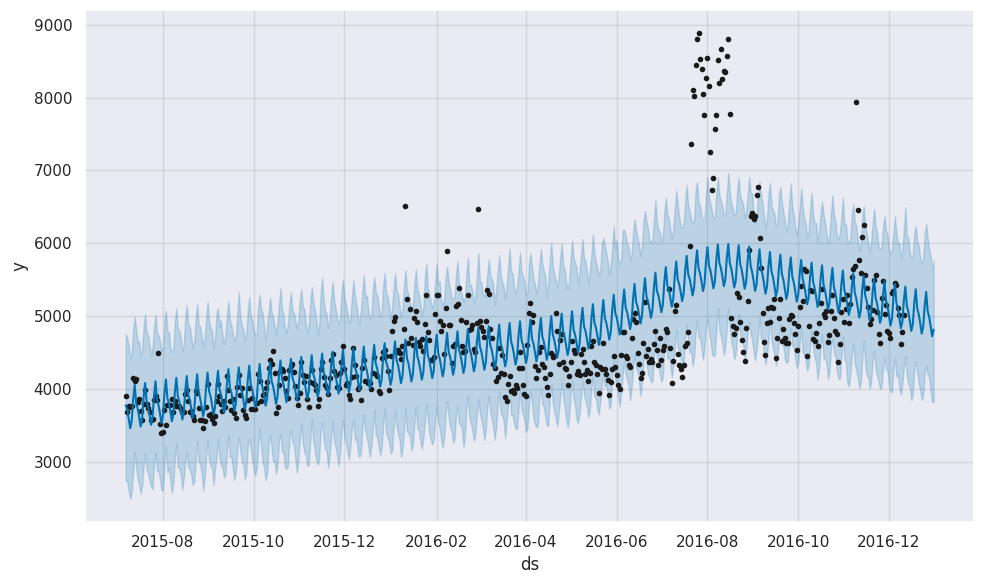

In [88]:
from prophet import Prophet
m = Prophet(weekly_seasonality=True)
m.fit(df2[['ds', 'y']][:-20])
future = m.make_future_dataframe(periods=20,freq="D") #prophet without exogenous
forecast = m.predict(future)
fig = m.plot(forecast)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnm50dwfh/m1170234.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnm50dwfh/jsfsx2qt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93156', 'data', 'file=/tmp/tmpnm50dwfh/m1170234.json', 'init=/tmp/tmpnm50dwfh/jsfsx2qt.json', 'output', 'file=/tmp/tmpnm50dwfh/prophet_modelik2f59g5/prophet_model-20251011110542.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:05:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:05:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


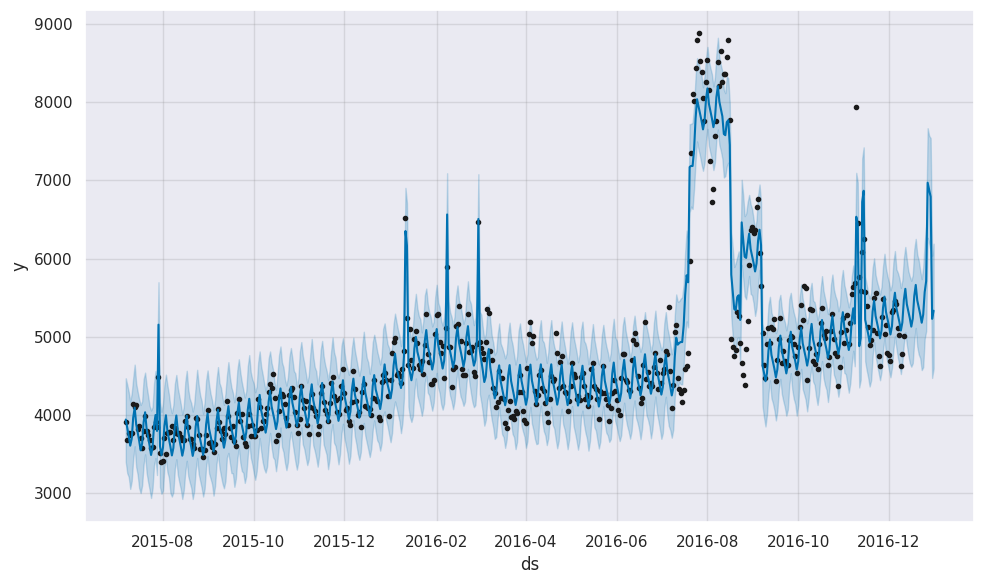

In [89]:
model2=Prophet(interval_width=0.9, weekly_seasonality=True, changepoint_prior_scale=1) #prophet with exogenous
model2.add_regressor('exog')
model2.fit(df2[:-20])
forecast2 = model2.predict(df2)
fig = model2.plot(forecast2)

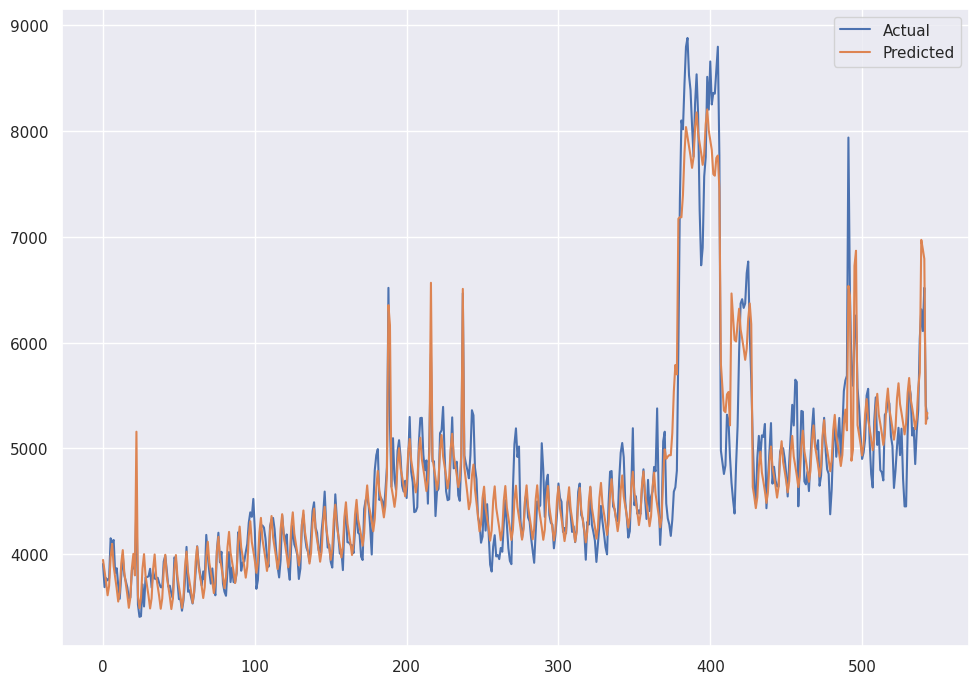

In [90]:
y_true = df2['y'].values
y_pred = forecast2['yhat'].values

plot.plot(y_true, label='Actual')
plot.plot(y_pred, label='Predicted')
plot.legend()
plot.show()

In [91]:
mape = np.mean(np.abs(forecast2['yhat'][-20:] - df2['y'][-20:].values)/np.abs(df2['y'][-20:].values))
print("mape:",mape)

mape: 0.06563482867071906


- Prophet does not perform well on non-stationary data because it is difficult to find the actual seasonality and trend of the data if the patterns are inconsistent.

# **Comparing the predicted views for different languages**

**For doing this we are going to automate the procedure from loading the separate data for each langauge to doing out of sample forecasting for the next month, and then comparing the results.**

In [97]:
def grid_search(ts):
    v=[0,1,2,3]
    mape=100
    val=[0,0,0]
    for p in v:
        for d in v:
            for q in v:
                try:
                    model = ARIMA(ts[:-20], order=(p,d,q))
                    model_fit = model.fit()
                    fc, se, conf = model_fit.forecast(20, alpha=0.02)
                    x = np.mean(np.abs(fc - ts[-20:].values)/np.abs(ts[-20:].values))
                    if(x<mape):
                        mape=x
                        val=[p,d,q]

                except:
                    pass

    return(mape, val)

This functions works like a grid search for getting the best value of p,d,q by comparing the mape  of all models that we create.

the values of p,d,q that give the least mape score are saved and returned

In [100]:
def all_arima(train,test,val):
    model = ARIMA(train, order=(val[0], val[1], val[2]))
    fitted = model.fit()

  # Forecast
    fc = fitted.forecast(30) # Expecting a single return value

    fc_series = pd.Series(fc, index=test.index)

  # Plot
    plot.figure(figsize=(12,5), dpi=100)
    plot.plot(train, label='training')
    plot.plot(test, label='actual')
    plot.plot(fc_series, label='forecast')
    plot.title('Forecast vs Actuals')
    plot.legend(loc='upper left', fontsize=8)
    plot.show()
    mape = np.mean(np.abs(fc - test.values)/np.abs(test.values))
    rmse = np.mean((fc - test.values)**2)**.5
    print("mape:",mape)
    print("rsme:",rmse)
    return (fc)

This function takes the p,d,q values that we calculated earlier and then trains a model on it, does forecast and plots them for visualization.

it also calculates the sum of forecased views for the next 30 days and returns it back

language:  de
100 [0, 0, 0]


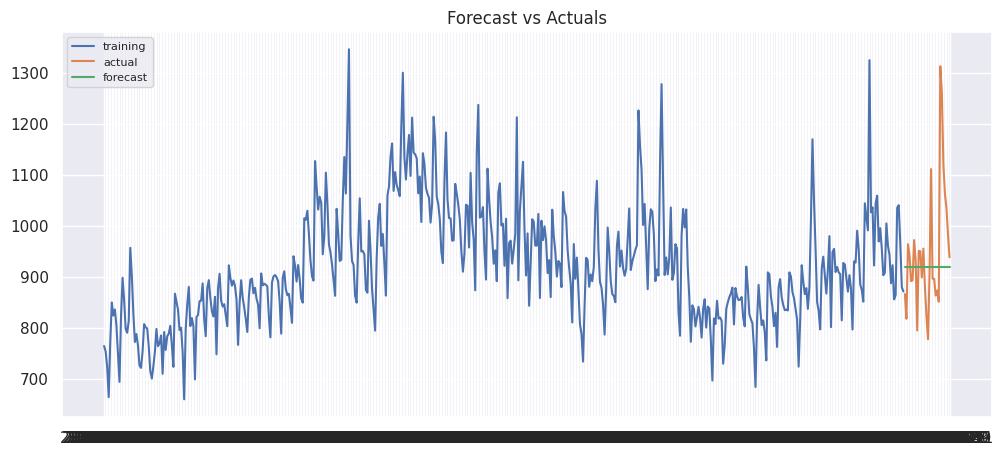

mape: 0.08433714607952147
rsme: 125.02398798986206
language:  en
100 [0, 0, 0]


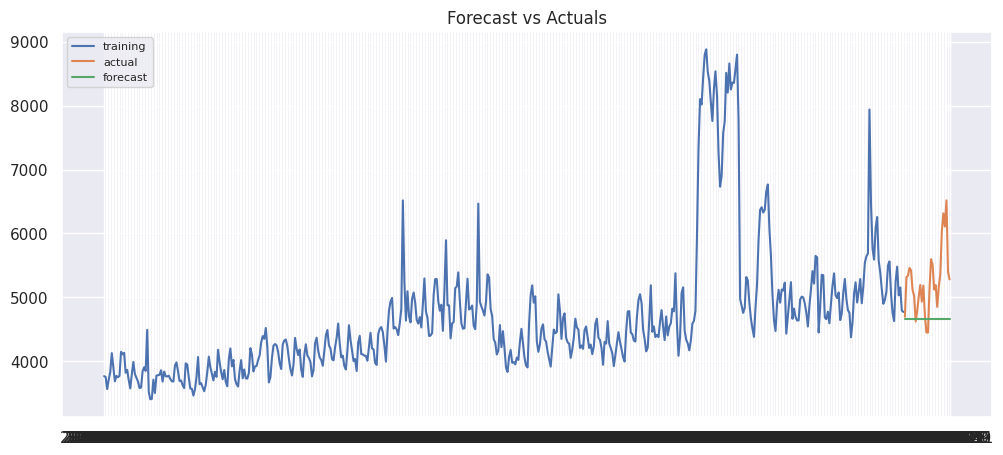

mape: 0.10994799500482501
rsme: 761.4523876477016
language:  es
100 [0, 0, 0]


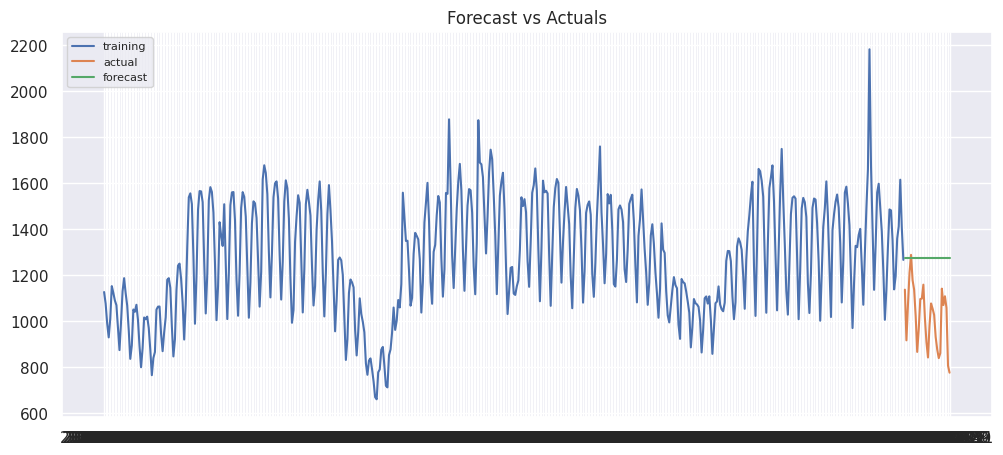

mape: 0.2757793993411583
rsme: 289.0479417345804
language:  fr
100 [0, 0, 0]


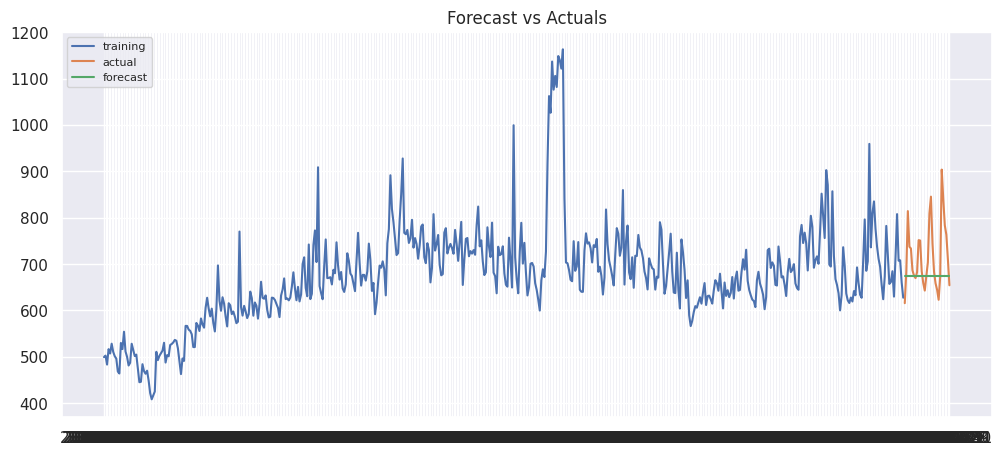

mape: 0.07484895957241428
rsme: 82.41479843053105
language:  ja
100 [0, 0, 0]


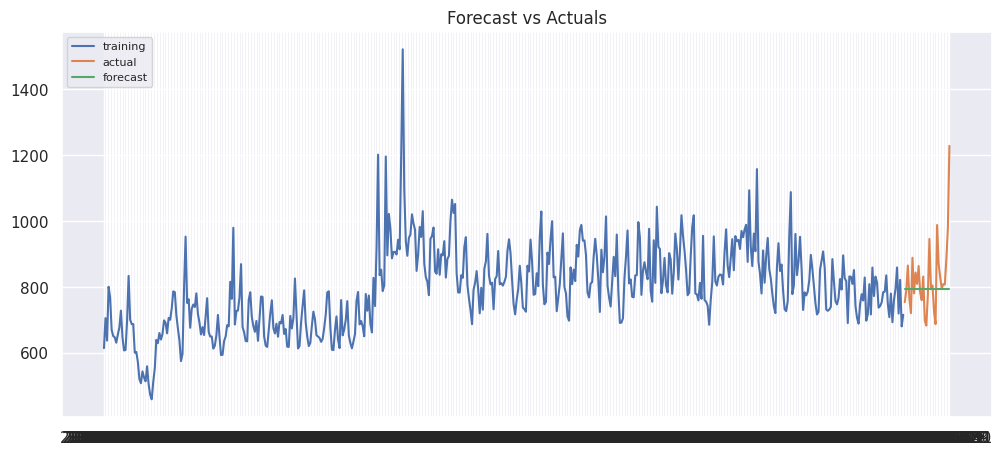

mape: 0.08086798924443844
rsme: 111.15945065900381
language:  no_lang
100 [0, 0, 0]


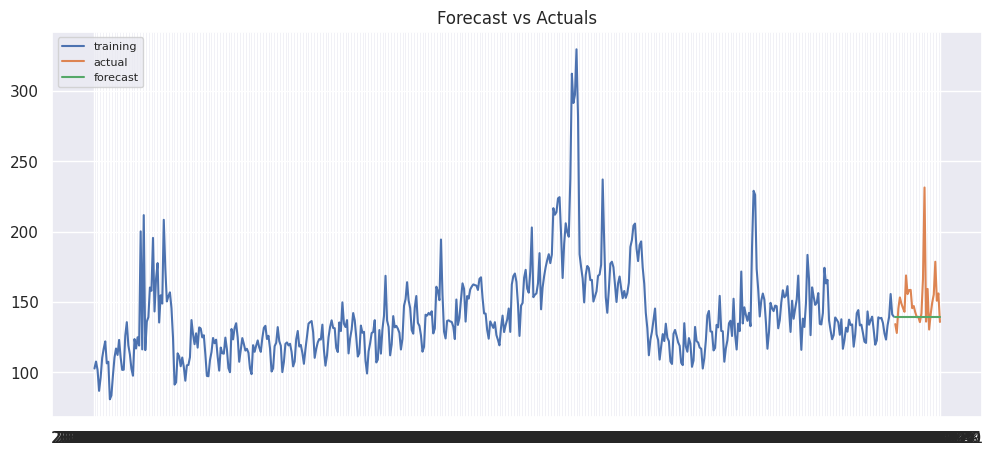

mape: 0.08211284038410901
rsme: 21.97335207316331
language:  ru
100 [0, 0, 0]


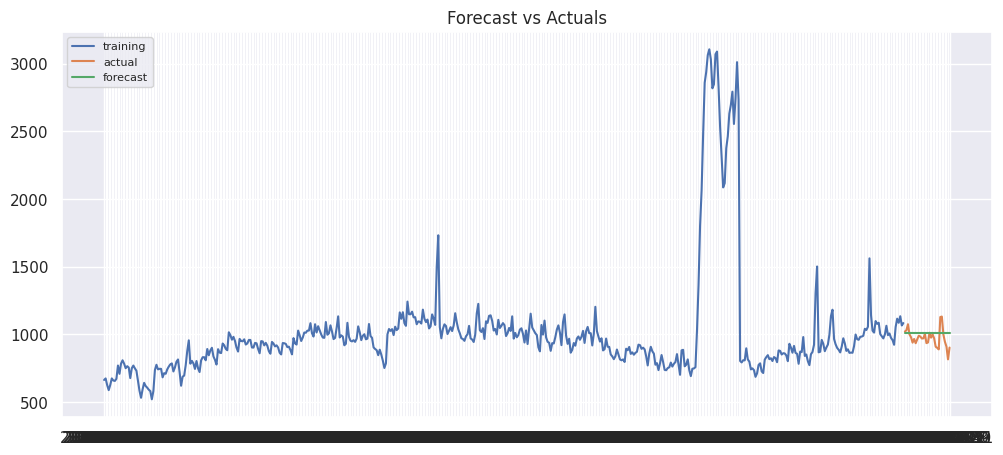

mape: 0.0635203540412519
rsme: 75.15323774301888
language:  zh
100 [0, 0, 0]


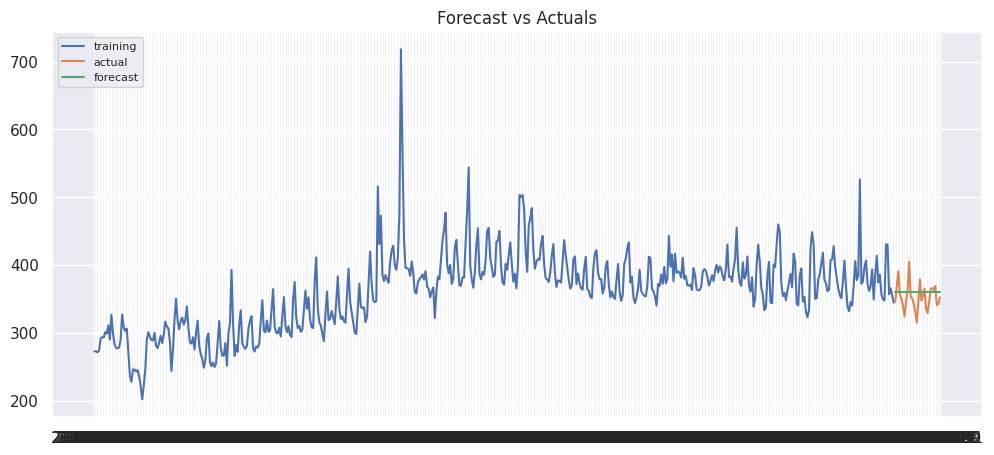

mape: 0.04704826295161647
rsme: 20.175020099403476


In [101]:
import warnings
warnings.filterwarnings("ignore")
views_prediction={}
for c in total_view:
    print("language: ",c)
    ts=(total_view[c])
    mape,val=grid_search(ts)
    print(mape,val)
    train = ts[:520]
    test = ts[520:]
    fc=all_arima(train,test,val)
    views_prediction[c]=fc

* This function is what calls and drives all the other functions.

* It first gets the data for a particular language.

* checks stationarity.

* Gets the optimal p,d,q values from grid search

* uses that value to train the model, forecast and plot it

